# Solution

Here you will find the solution for the challenge C.

The correct flux is: 1.31e+18 H/m2/s

In [2]:
import festim as F
import h_transport_materials as htm
import numpy as np

results_folder = "challenge_B/"

my_model = F.Simulation()

# define mesh
vertices = np.linspace(2e-02, 2.5e-02, num=1000)

my_model.mesh = F.MeshFromVertices(vertices=vertices, type="cylindrical")

# define materials

# eurofer properties
D_eurofer = htm.diffusivities.filter(material="eurofer_97").filter(author="chen")[0]

S_eurofer = htm.solubilities.filter(material="eurofer_97").filter(author="chen")[0]

Recomb_eurofer = htm.recombination_coeffs.filter(material="steel").filter(
    author="grant"
)[2]

eurofer = F.Material(
    id=1,
    D_0=D_eurofer.pre_exp.magnitude,
    E_D=D_eurofer.act_energy.magnitude,
)
my_model.materials = eurofer

# define temperature
my_model.T = F.Temperature(value=600)

# define boundary conditions
my_model.boundary_conditions = [
    F.SievertsBC(
        surfaces=1,
        S_0=S_eurofer.pre_exp.magnitude,
        E_S=S_eurofer.act_energy.magnitude,
        pressure=5e7,
    ),
    F.RecombinationFlux(
        surfaces=2,
        Kr_0=Recomb_eurofer.pre_exp.magnitude,
        E_Kr=Recomb_eurofer.act_energy.magnitude,
        order=2,
    ),
]

# define settings
my_model.settings = F.Settings(
    absolute_tolerance=1e-10,
    relative_tolerance=1e-10,
    transient=False,
)

# define exports
my_derived_quantities = F.DerivedQuantities(
    [F.SurfaceFluxCylindrical("solute", surface=2)],
    show_units=True,
)
my_model.exports = F.Exports(
    [my_derived_quantities, F.TXTExport(field=0, filename="./mobile.txt")]
)

# run simulation
my_model.initialise()
my_model.run()

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solved problem in 1.10 s


In [ ]:
surface_flux = np.abs(my_derived_quantities[0].data[0])

print(f"Surface flux = {surface_flux:.2e} H/m2/s")

Surface flux = 1.31e+18 H/m2/s


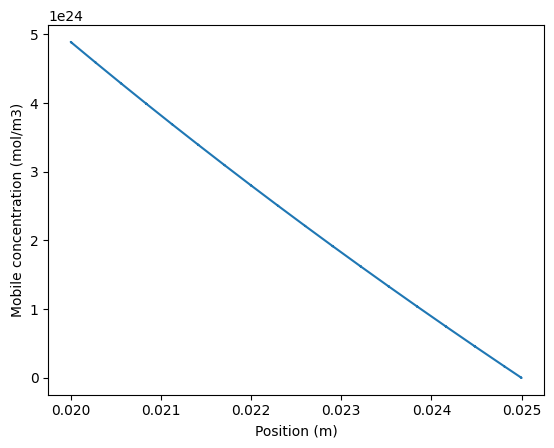

In [ ]:
import matplotlib.pyplot as plt

data = np.genfromtxt("mobile.txt", delimiter=",", skip_header=1)
plt.plot(data[:, 0], data[:, 1])
plt.xlabel("Position (m)")
plt.ylabel("Mobile concentration (mol/m3)")
plt.show()